In [2]:
# Import packages
from fuzzywuzzy import fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pymongo
import string
import nltk
import re
import os
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')



src_dir = os.path.join(os.getcwd(), '..', '..', 'src')
sys.path.append(src_dir)

# helper functions
from d02_processing.cleaning_signatures import sorted_signatures
from d02_processing.cleaning_signatures import cleaned_signatures
from d01_utils.mongo_cursor_creator import mongo_cursor

# Load the "autoreload" extension
%load_ext autoreload

# reload modules so that as you change code in src, it gets loaded
%autoreload

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# open up a Mongo Connection and create a cursor
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
curlydb = myclient['Naturaly_Curly_db']
curly_collection = curlydb['curly_profiles']

In [5]:
# Access all the unique items and store them to a list
query_1 = curly_collection.find({})
test = []
for x in query_1:
    test.append(x['signature'])

# This is the number of total entire in the database
print(len(test)) 

532489


In [13]:
unique = list(set(test))
print(len(unique))
unique[0:10]

7961


['',
 'My Routine:\nCoconut oil drench the night before I co-wash\nthen cowash and deep condition each time w/ Keracare Humecto, Joico Moisture Recovery and/or ApHogee 2min\nthen usually airdry\nGrapeseed oil nightly\n\n(no gel, mouse, or hair spray. My delicate, fine hair will tear if I even try to run my fingers through it with any of those. :angel9:)\nMy go to leave ins are now: my regular conditioners listed above, gs oil, or PW77',
 '2a/b, low porosity, medium density, coarse',
 "2c? 3a? Mostly coarse, but LOVIN' the proteins and fighting overconditioning! My hair is just plain weird :glasses1:\n\nLowPOO; Creme of Nature shampoo\nCO; L'Oreal Nutrigloss & AOGBP\nOther; nettle tea once a week instead of CO, JCRR, JCAS\nStylers; KCCC, L'oreal studio line gel\nDon't like; PVP, non-vegetable glycerine\n\nhttp://pscurly.blogspot.com/ <-- my very own, dutch, blog! Check it out :tongue3:",
 'tight coils/tight waves pen coil curls',
 ':love5:coily ~ kinky ~ fine ~ 4 ~ no-poo\nDesert Essenc

In [20]:


documents = unique

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 5))
X = vectorizer.fit_transform(documents)

true_k = 10
model = KMeans(n_clusters=true_k, init='random', max_iter=200, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["2a wavy low porosity"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["4c low porosity medium/fine density thick, ecoslay marmalade"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 fotki com
 public fotki com
 public fotki
 http public
 http public fotki
 http public fotki com
 fotki http public
 fotki http public fotki com
 fotki http public fotki
 fotki http
Cluster 1:
 3b cg
 strawberry blonde
 3a 3b cg
 need haircut
 strawberry blonde 3a
 3a 3b
 desperate need haircut
 blonde 3a
 desperate need
 cg shampoo
Cluster 2:
 low poo
 currently using
 conditioner leave
 poo conditioner
 conditioning balm
 suave naturals
 normal porosity
 shea moisture
 high porosity
 coconut oil
Cluster 3:
 3a 3b
 normal porosity
 texture normal
 normal elasticity
 texture normal porosity
 porosity normal
 normal porosity normal
 porosity normal elasticity
 normal porosity normal elasticity
 medium texture
Cluster 4:
 2c 3a
 la looks
 looks sport
 la looks sport
 3a fine
 sport gel
 high porosity
 suave naturals
 looks sport gel
 2c 3a fine
Cluster 5:
 2b 3a
 type 2b
 2b 2c
 hair type
 hair type 2b
 high porosity
 type 2b 3a
 sigpic sigpic
 3c 4a
 2

In [17]:
for s in unique:
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    s = s.lower()
    s = re.sub(r"\n", " ", s)
    s = re.sub(r"med\s", "medium ", s)
    s = re.sub(r"hi\s", "high ", s)
    s = re.sub(r"po\s", "porosity ", s)
    s = re.sub(r"den\s", "density ", s)
    s = re.sub(r"www", "", s)
    s = re.sub(r"blog", "", s)
    s = re.sub(r"naturallycurly", "", s)
    s = re.sub(r"com", "", s)
    s = re.sub(r"public", "", s)
    s = re.sub(r"http", "", s)
    s = re.sub(r"fotki", "", s)
    s = re.sub(r"youtube", "", s)
    s = re.sub(r"hair", "", s)
    s = re.sub(r"trying", "", s)
    
    

In [42]:
# look at stop words for things like 'be' got to be glued 
    stop_words_sigs = ['www', 'blog', 'naturallycurly', 'com', 'public', 'http', 'fotki', 'hair', 'trying', 'try','sigpic', 'youtube', 'channel', 'anxiety', 'depression', 'audrey', 'hepburn']

IndentationError: unexpected indent (<ipython-input-42-727a024262bf>, line 2)

In [45]:
# look at stop words for things like 'be' got to be glued 
    stop_words_sigs = ['www', 'blog', 'naturallycurly', 'com', 'public', 'http', 'fotki', 'hair', 'trying', 'try','sigpic' , 'youtube', 'channel', 'anxiety', 'depression', 'audrey', 'hepburn']

IndentationError: unexpected indent (<ipython-input-45-9cebdf6ac40e>, line 2)

In [36]:
from sklearn.feature_extraction import text 
#len(text.ENGLISH_STOP_WORDS)
hair_stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_sigs)
len(hair_stop_words)

331

In [37]:


documents = unique

vectorizer = TfidfVectorizer(stop_words=hair_stop_words, ngram_range=(2, 5))
X = vectorizer.fit_transform(documents)

true_k = 10
model = KMeans(n_clusters=true_k, init='random', max_iter=200, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["2a wavy low porosity"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["4c low porosity medium/fine density thick, ecoslay marmalade"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 2b 3a
 big chop
 type 2b
 high porosity
 type 4a
 3a 3b
 shoulder length
 type 2b 3a
 2c 3a
 3b fine
Cluster 1:
 3a redhead
 growing pixie
 cg low
 cg low poo
 modified cg low poo
 modified cg low
 low poo
 growing pixie cut
 pixie cut
 mousse hett
Cluster 2:
 2c 3a
 3a 3b
 suave naturals
 high porosity
 shoulder length
 type 2c
 normal porosity
 low poo
 3a fine
 3a 2c
Cluster 3:
 high density
 2c 3a
 porosity high
 low porosity
 density medium
 medium porosity
 porosity high density
 porosity medium
 medium texture
 medium density
Cluster 4:
 3c 4a
 modified cg
 4a 4b
 type 3c
 type 3c 4a
 3b 3c 4a
 3b 3c
 coconut oil
 3c 4a 4b
 3a modified
Cluster 5:
 3b 3c
 3a 3b
 2c 3a
 type 3b
 3a fine
 type 3a
 shoulder length
 low poo
 2b 2c
 suave naturals
Cluster 6:
 green tea
 acai berry
 burts bee
 garnier wb
 green tea shampoo
 tea shampoo
 lll green
 lll green tea
 conditioner botanics
 jojoba coconut oil
Cluster 7:
 nature gate
 gate aloe
 nature gate a

In [29]:
# After getting clusters then maybe run the cleaning algorithm on each cluster 
# and then plot most common characteristics, do pattens emerge?

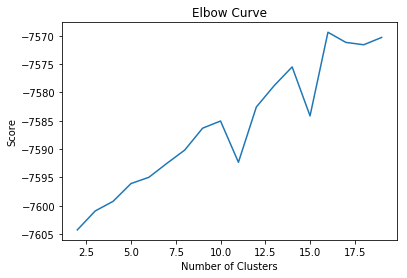

In [34]:
Nc = range(2, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()